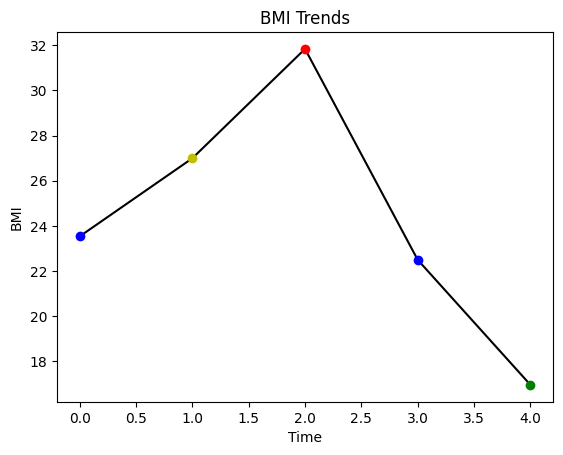

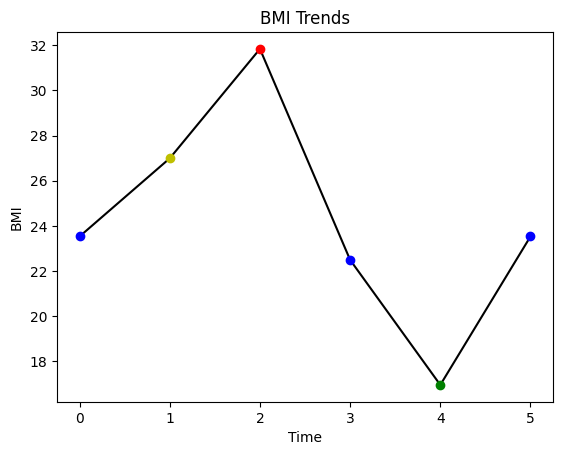

In [1]:
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
import csv

class BMICalculator:
    def __init__(self, root):
        self.root = root
        self.root.title("BMI Calculator")
        self.root.geometry("400x300")

        self.weight_label = tk.Label(root, text="Weight (kg):")
        self.weight_label.pack()
        self.weight_entry = tk.Entry(root)
        self.weight_entry.pack()

        self.height_label = tk.Label(root, text="Height (m):")
        self.height_label.pack()
        self.height_entry = tk.Entry(root)
        self.height_entry.pack()

        self.calculate_button = tk.Button(root, text="Calculate BMI", command=self.calculate_bmi)
        self.calculate_button.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        self.data_button = tk.Button(root, text="View Historical Data", command=self.view_data)
        self.data_button.pack()
        self.graph_button = tk.Button(root, text="View BMI Trend", command=self.view_graph)
        self.graph_button.pack()
        self.data = []

    def calculate_bmi(self):
        try:
            weight = float(self.weight_entry.get())
            height = float(self.height_entry.get())

            if weight <= 0 or height <= 0:
                raise ValueError("Invalid input")

            bmi = weight / (height ** 2)
            category = self.get_category(bmi)

            self.result_label.config(text=f"BMI: {bmi:.2f} ({category})")

            self.data.append((weight, height, bmi, category))
            self.save_data()

        except ValueError as e:
            messagebox.showerror("Error", str(e))

    def get_category(self, bmi):
        if bmi < 18.5:
            return "Underweight"
        elif bmi < 25:
            return "Normal"
        elif bmi < 30:
            return "Overweight"
        else:
            return "Obese"

    def view_data(self):
        data_window = tk.Toplevel(self.root)
        data_window.title("Historical Data")

        data_text = tk.Text(data_window)
        data_text.pack()

        for i, (weight, height, bmi, category) in enumerate(self.data):
            data_text.insert(tk.END, f"Entry {i+1}: Weight={weight:.2f}kg, Height={height:.2f}m, BMI={bmi:.2f} ({category})\n")

    def view_graph(self):
        weights = []
        heights = []
        bmis = []
        labels = []
        for item in self.data:
            if len(item) == 4:
                weight, height, bmi, label = item
                weights.append(weight)
                heights.append(height)
                bmis.append(bmi)
                labels.append(label)
        plt.plot(bmis, color='black')
        for i, bmi in enumerate(bmis):
            if bmi < 18.5:
                plt.plot([i], [bmi], 'go')  
            elif bmi < 25:
                plt.plot([i], [bmi], 'bo')  
            elif bmi < 30:
                plt.plot([i], [bmi], 'yo')  
            else:
                plt.plot([i], [bmi], 'ro')

        plt.xlabel('Time')
        plt.ylabel('BMI')
        plt.title('BMI Trends')
        plt.show()
        
    def save_data(self):
        with open("bmi_data.csv", "w", newline="") as csvfile:
            writer = csv.writer(csvfile)
            writer.writerow(["Weight", "Height", "BMI", "Category"])
            writer.writerows(self.data)

if __name__ == "__main__":
    root = tk.Tk()
    app = BMICalculator(root)
    root.mainloop()